In [1]:
## Import libraries
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy

source = "../source"
sys.path.append(source)

from compilation import Compiler, ScalarTracker, ActivationTracker
import publication
import simulate

save = False

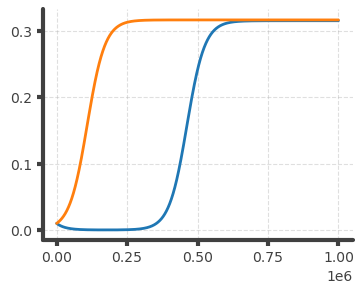

In [2]:
fig, ax = plt.subplots(figsize=(4, 3))

dx2 = 1

dy2 = 0.1
h0 = 0.01
y0 = h0**2
theta = 0.99  # between -1 and 1
w0 = y0 + theta * np.sqrt(y0 * dy2)

eta_h = 0.0001
eta_y = eta_h

epochs = 1000000

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)


dy2 = 0.1
theta = -0.99
w0 = y0 + theta * np.sqrt(y0 * dy2)

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z_2 = sol.sol(t)

publication.set_color_mixed()
plt.plot(t, z[0])
plt.plot(t, z_2[0])
# plt.ylim(0, 0.2)
publication.plt_show()

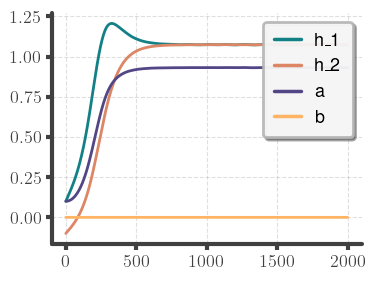

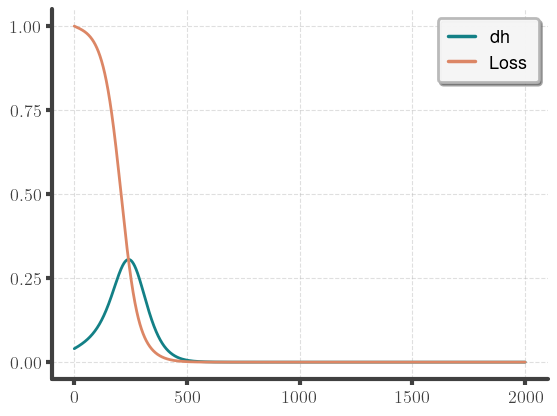

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))


def der(t, z, eta_h_1, eta_h_2, eta_a, eta_b, y_1, y_2):
    """Right hand side of the 3d ode system."""
    h_1, h_2, a, b = z
    return [
        -eta_h_1 * a * (a * h_1 + b - y_1),
        -eta_h_2 * a * (a * h_2 + b - y_2),
        -eta_a * (1 / 2) * (h_1 * (a * h_1 + b - y_1) + h_2 * (a * h_2 + b - y_2)),
        0,
    ]


eta_h_1, eta_h_2, eta_a, eta_b = 0.02, 0.01, 0.01, 0.00
y_1, y_2 = 1, 1
h_1_0, h_2_0, a_0, b_0 = 0.1, -0.1, 0.1, 0

epochs = 2000

sol = scipy.integrate.solve_ivp(
    der,
    [0, epochs],
    [h_1_0, h_2_0, a_0, b_0],
    args=(eta_h_1, eta_h_2, eta_a, eta_b, y_1, y_2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)
h_1, h_2, a, b = z[0], z[1], z[2], z[3]

publication.set_color_mixed()
plt.plot(t, h_1, label="h_1")
plt.plot(t, h_2, label="h_2")
plt.plot(t, a, label="a")
plt.plot(t, b, label="b")
# plt.ylim(0, 0.01)
plt.legend()
publication.plt_show()
publication.set_color_mixed()
plt.plot(t, (h_2 - h_1) ** 2, label="dh")
# plt.plot(t, a ** 2 * (h_2 - h_1) ** 2, label="dy")
plt.plot(t, 0.5 * ((a * h_1 + b - y_1) ** 2 + (a * h_2 + b - y_2) ** 2), label="Loss")
plt.legend()
publication.plt_show()

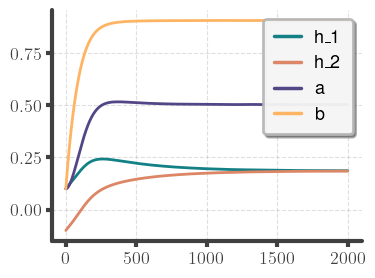

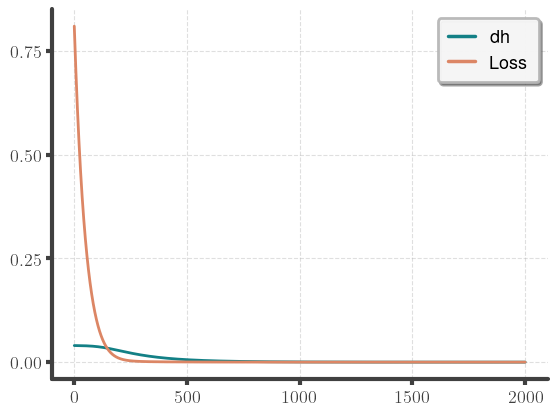

In [4]:
fig, ax = plt.subplots(figsize=(4, 3))


def der(t, z, eta_h_1, eta_h_2, eta_a, eta_b, y_1, y_2):
    """Right hand side of the 3d ode system."""
    h_1, h_2, a, b = z
    return [
        -eta_h_1 * a * (a * h_1 + b - y_1),
        -eta_h_2 * a * (a * h_2 + b - y_2),
        -eta_a * (1 / 2) * (h_1 * (a * h_1 + b - y_1) + h_2 * (a * h_2 + b - y_2)),
        -eta_b * (1 / 2) * ((a * h_1 + b - y_1) + (a * h_2 + b - y_2)),
    ]


eta_h_1, eta_h_2, eta_a, eta_b = 0.01, 0.01, 0.1, 0.01
y_1, y_2 = 1, 1
gain = 0.1
h_1_0, h_2_0, a_0, b_0 = gain, -gain, gain, gain

epochs = 2000

sol = scipy.integrate.solve_ivp(
    der,
    [0, epochs],
    [h_1_0, h_2_0, a_0, b_0],
    args=(eta_h_1, eta_h_2, eta_a, eta_b, y_1, y_2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)
h_1, h_2, a, b = z[0], z[1], z[2], z[3]

publication.set_color_mixed()
plt.plot(t, h_1, label="h_1")
plt.plot(t, h_2, label="h_2")
plt.plot(t, a, label="a")
plt.plot(t, b, label="b")
# plt.ylim(0, 0.01)
plt.legend()
publication.plt_show()
publication.set_color_mixed()
plt.plot(t, (h_2 - h_1) ** 2, label="dh")
# plt.plot(t, a ** 2 * (h_2 - h_1) ** 2, label="dy")
plt.plot(t, 0.5 * ((a * h_1 + b - y_1) ** 2 + (a * h_2 + b - y_2) ** 2), label="Loss")
plt.legend()
publication.plt_show()

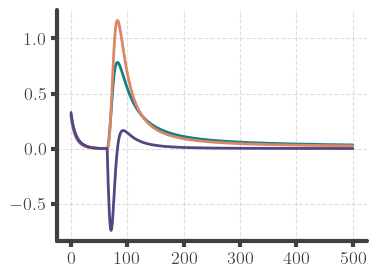

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))

dx2 = 1
dy2 = 0.01

h0 = 0.3
y0 = 0.3
theta = 0.5  # between -1 and 1
w0 = y0 + theta * np.sqrt(y0 * dy2)

eta_h = 0.1
eta_y = eta_h

epochs = 500

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)

publication.set_color_mixed()
plt.plot(t, z[0])
plt.plot(t, z[1])
plt.plot(t, z[2])
# plt.ylim(0, 0.01)
publication.plt_show()

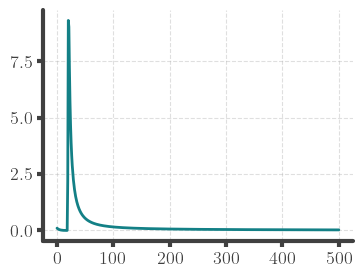

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))

dx2 = 1
dy2 = 0.01

h0 = 0.1
y0 = 0.2
theta = 0.9  # between -1 and 1
w0 = y0 + theta * np.sqrt(y0 * dy2)

eta_h = 0.1
eta_y = eta_h

epochs = 500

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)

publication.set_color_mixed()
plt.plot(t, z[0])
# plt.plot(t, z[1])
# plt.plot(t, z[2])s
# plt.ylim(0, 0.01)
publication.plt_show()

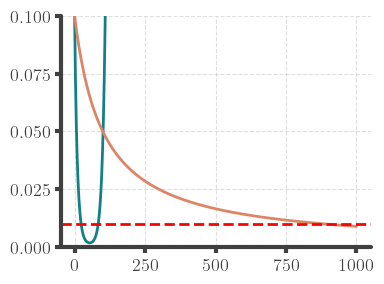

In [7]:
fig, ax = plt.subplots(figsize=(4, 3))


h0 = 0.1
y0 = h0**2
theta = 0.99  # between -1 and 1

epochs = 1000

eta_h, eta_y = 0.1, 0.1


dx2 = 1
dy2 = 1

w0 = y0 + theta * np.sqrt(y0 * dy2)

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)
publication.set_color_mixed()
plt.plot(t, z[0])

dy2 = 0
w0 = y0 + theta * np.sqrt(y0 * dy2)

sol = scipy.integrate.solve_ivp(
    simulate.der,
    [0, epochs],
    [h0, y0, w0],
    args=(eta_h, eta_y, dx2, dy2),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)
publication.set_color_mixed()
plt.plot(t, z[0])
plt.ylim(0, 0.1)
plt.axhline(0.01, color="r", linestyle="--")
publication.plt_show()

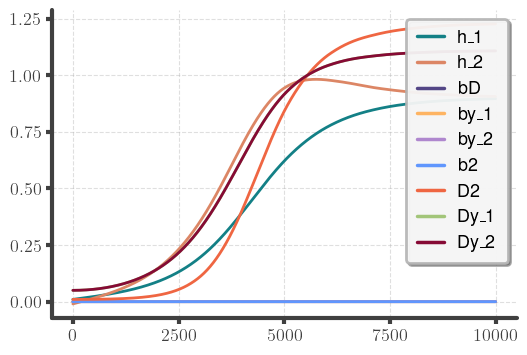

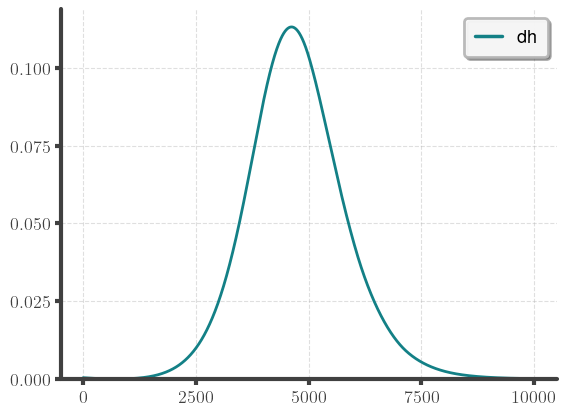

In [16]:
def der(t, z, eta_h_1, eta_h_2, eta_a, eta_b, N, y11, y12, y22):
    """Right hand side of the ode system."""
    h_1, h_2, bD, by_1, by_2, b2, D2, Dy_1, Dy_2 = z
    h_mean = (h_1 + h_2) / 2
    h2_mean = (h_1**2 + h_2**2) / 2
    Dy_mean = (Dy_1 + Dy_2) / 2
    by_mean = (by_1 + by_2) / 2
    hb_mean = (h_1 * by_1 + h_2 * by_2) / 2
    Dhy_mean = (h_1 * Dy_1 + h_2 * Dy_2) / 2
    hy2_mean_1 = (h_1 * y11 + h_2 * y12) / 2
    hy2_mean_2 = (h_1 * y12 + h_2 * y22) / 2
    return [
        -eta_h_1 * (1 / 2) * (bD + h_1 * D2 - Dy_1),
        -eta_h_2 * (1 / 2) * (bD + h_2 * D2 - Dy_2),
        -eta_b * (1 / N) * (bD + h_mean * D2 - Dy_mean)
        - eta_a * (1 / N) * (h2_mean * bD + h_mean * b2 - hb_mean),
        -eta_b * (1 / N) * (by_1 + h_mean * Dy_1 - (y11 + y12) / 2),
        -eta_b * (1 / N) * (by_2 + h_mean * Dy_2 - (y22 + y12) / 2),
        -eta_b * (2 / N) * (b2 + h_mean * bD - by_mean),
        -eta_a * (2 / N) * (h2_mean * D2 + h_mean * bD - Dhy_mean),
        -eta_a * (1 / N) * (h2_mean * Dy_1 + h_mean * by_1 - hy2_mean_1),
        -eta_a * (1 / N) * (h2_mean * Dy_2 + h_mean * by_2 - hy2_mean_2),
    ]


y_1, y_2 = 1, 1
N = 1
y11, y12, y22 = y_1**2, y_1 * y_2, y_2**2

lr = 0.001
eta_h_1, eta_h_2, eta_a, eta_b = lr, 2 * lr, 1 * lr, 0 * lr

gain = 0.01
theta_bD, theta_by_1, theta_by_2, theta_Dy_1, theta_Dy_2 = 0, 0, 0, 0, 0
theta_bD, theta_by_1, theta_by_2, theta_Dy_1, theta_Dy_2 = (
    0.5,
    0.5,
    0.5,
    0.5,
    0.5,
)  # These may depend on y11, y12, y22
h_1_0, h_2_0, D2_0, b2_0 = (gain, -gain, gain, 0)
bD_0, by_1_0, by_2_0, Dy_1_0, Dy_2_0 = (
    theta_bD * np.sqrt(b2_0 * D2_0),
    theta_by_1 * np.sqrt(b2_0 * y_1**2),
    theta_by_2 * np.sqrt(b2_0 * y_2**2),
    theta_Dy_1 * np.sqrt(D2_0 * y_1**2),
    theta_Dy_2 * np.sqrt(D2_0 * y_2**2),
)

epochs = 10000

sol = scipy.integrate.solve_ivp(
    der,
    [0, epochs],
    [h_1_0, h_2_0, bD_0, by_1_0, by_2_0, b2_0, D2_0, Dy_1_0, Dy_2_0],
    args=(eta_h_1, eta_h_2, eta_a, eta_b, N, y11, y12, y22),
    dense_output=True,
)
t = np.linspace(0, epochs, epochs)
z = sol.sol(t)
h_1, h_2, bD, by_1, by_2, b2, D2, Dy_1, Dy_2 = z

publication.set_color_mixed()
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(t, h_1, label="h_1")
plt.plot(t, h_2, label="h_2")
plt.plot(t, bD, label="bD")
plt.plot(t, by_1, label="by_1")
plt.plot(t, by_2, label="by_2")
plt.plot(t, b2, label="b2")
plt.plot(t, D2, label="D2")
plt.plot(t, Dy_1, label="Dy_1")
plt.plot(t, Dy_2, label="Dy_2")
plt.legend()
publication.plt_show()
publication.set_color_mixed()
plt.plot(t, (h_2 - h_1) ** 2, label="dh")
# plt.plot(t, h_1 * Dy_1 + by_1, label="y_1y_1*")
# plt.plot(
#     t,
#     1 / 4 * ((h_1 * Dy_1 + by_1 - y_1) ** 2 + (h_2 * Dy_2 + by_2 - y_2) ** 2),
#     label="train loss bound",
# )
plt.ylim(0)
plt.legend()
publication.plt_show()

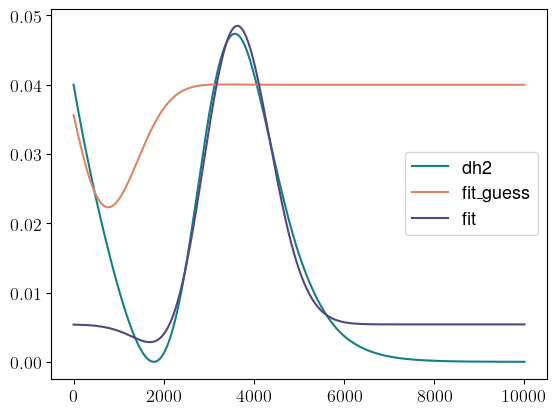

In [9]:
def f(t, mu, sigma, A, B, omega, phi):
    return A * np.cos(omega * t + phi) * np.exp(-((t - mu) ** 2) / (2 * sigma**2)) + B


guess = (0, 1000, 0.03, 0.04, 0.001, 8)
mu, sigma, A, B, omega, phi = scipy.optimize.curve_fit(
    f, t, (h_1 - h_2) ** 2, p0=guess
)[0]

# plt.plot(t, (h_1 + h_2) / 2, label="h_mean")
plt.plot(t, (h_1 - h_2) ** 2, label="dh2")
# plt.plot(t, D2, label="D2")
# plt.plot(t, Dy_1, label="Dy")
# plt.plot(t, Dy_2, label="Dy")
plt.plot(t, f(*((t,) + guess)), label="fit_guess")
plt.plot(t, f(t, mu, sigma, A, B, omega, phi), label="fit")
plt.legend()

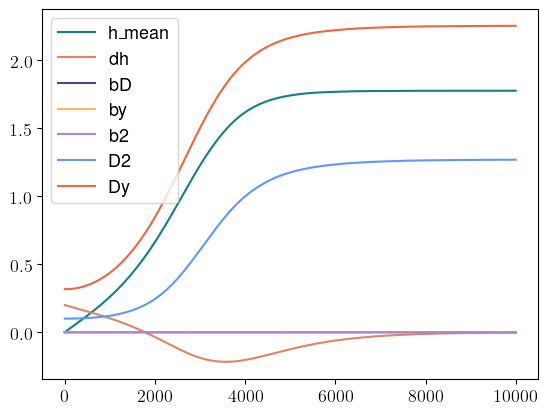

In [10]:
plt.plot(t, h_1 + h_2, label="h_mean")
plt.plot(t, h_1 - h_2, label="dh")
plt.plot(t, bD, label="bD")
plt.plot(t, by_1 + by_2, label="by")
plt.plot(t, b2, label="b2")
plt.plot(t, D2, label="D2")
plt.plot(t, Dy_1 + Dy_2, label="Dy")
plt.legend()

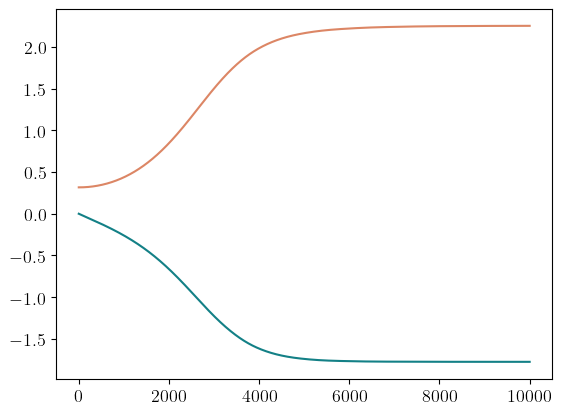

In [11]:
plt.plot(t, bD - 2 * (h_1 + h_2) / 2)
plt.plot(t, (Dy_1 + Dy_2))
# plt.ylim(0)

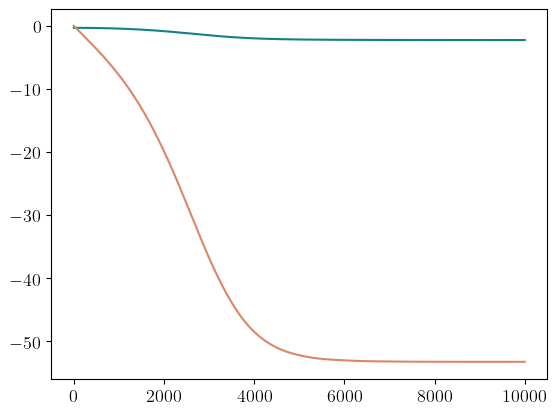

In [12]:
plt.plot(t, by_1 - Dy_1 + by_2 - Dy_2)
plt.plot(t, -30 * (h_1 + h_2))

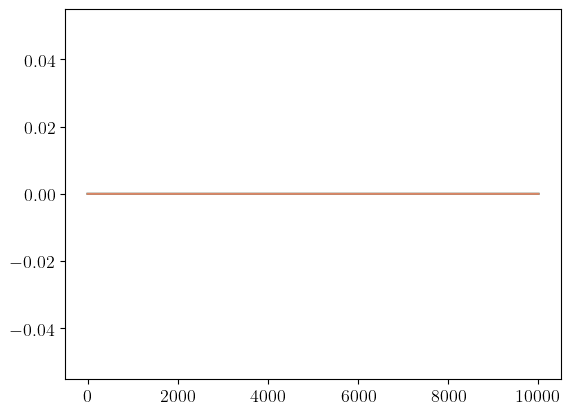

In [13]:
# plt.plot(t, -29 * (h_2 + h_1) - bD)
plt.plot(t, by_1 + by_2)
plt.plot(t, b2 * 2)
# plt.plot(t, bD)

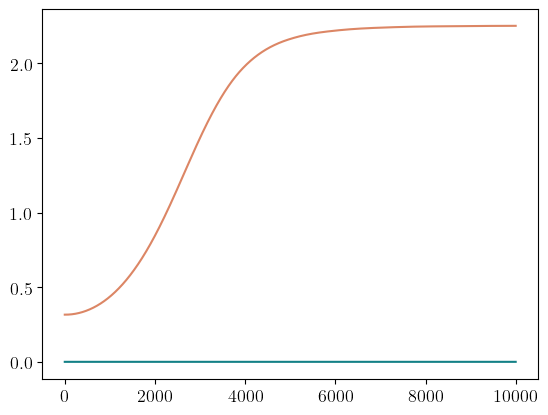

In [14]:
plt.plot(t, (by_1 + by_2) * (h_2 + h_1))
plt.plot(t, (Dy_1 + Dy_2))
# plt.ylim(0)

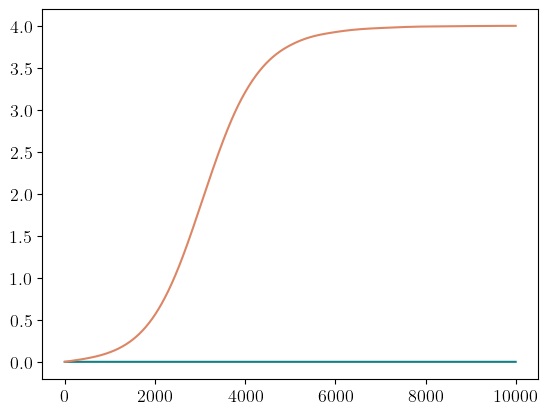

In [15]:
plt.plot(t, (by_1 + by_2))
plt.plot(t, (h_1 + h_2) * (Dy_1 + Dy_2))
# plt.ylim(0)